In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

#from tensorflow.keras.applications.inception_v3 import InceptionV3
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image 
import tensorflow.keras.backend as K
from numpy.linalg import norm
# Display
from IPython.display import Image as Image1
from IPython.display import display


import matplotlib.pyplot as plt
import matplotlib.cm as cm

2023-05-30 12:56:59.399932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 12:57:00.550299: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-30 12:57:00.550374: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-30 12:57:04.698773: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
model_builder = keras.applications.inception_v3
img_size = (299, 299)
preprocess_input = keras.applications.inception_v3.preprocess_input
decode_predictions = keras.applications.inception_v3.decode_predictions

model = InceptionV3(weights='imagenet')
name_last_conv = model.layers[-14].name

2023-05-17 15:56:10.583419: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-17 15:56:10.583487: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-17 15:56:10.583567: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-88TBBTR): /proc/driver/nvidia/version does not exist
2023-05-17 15:56:10.584794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
name_last_conv

'conv2d_93'

In [3]:
A = []
A.append((1,2))
A.append((3,7))

1

In [4]:
def get_heatmap(img_path):
    
    # Get 8x8 heatmap feature
    
    dim = 299


    img = image.load_img(img_path, target_size=(dim, dim))
    #model = InceptionResNetV2(weights='imagenet')

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #preds = model.predict(x)


    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer(name_last_conv)
        iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(x)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap = np.asarray(heatmap).astype(np.float64)
    heatmap = 1.01**heatmap
    heatmap /= np.max(heatmap)
    heatmap = 255* heatmap
    heatmap = heatmap.reshape((8, 8))
    return heatmap
    #plt.matshow(heatmap)
    #plt.show()


In [5]:

import os

def list_of_folders():
    data_folder_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray"
    folder_dir_list = os.listdir(data_folder_path)

    return folder_dir_list

    



def heatmap_n_folder():

    folder_dir_list = list_of_folders()

    
    for folder in folder_dir_list[8:10]:
        folder_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray"+ '/'+folder
        heat_path= "/mnt/c/Users/soaba/code/CNN/heatmap_folder"

        if not os.path.exists(heat_path+ '/'+ folder+'_heatmap'):
            os.makedirs(heat_path+ '/'+ folder+'_heatmap')

        dir_list = os.listdir(folder_path)
        for x in dir_list:
            heatmap = get_heatmap(folder_path+'/'+x)
            
            outfilez = open(heat_path+ '/'+ folder+'_heatmap'+ '/'+ x+ '_heat_data.pckl', 'wb')
            pickle.dump(heatmap, outfilez)
            outfilez.close()


    
                    
    return None


In [6]:
#Get heatmap
heatmap_n_folder()

In [13]:
import pickle

with open('heatmap_folder/n01682714_gray_heatmap/n01682714_10227.JPEG_heat_data.pckl', 'rb') as handle:
    Q= pickle.load(handle)


In [14]:
Q.max()

255.0

In [5]:
import numpy as np
A = np.array([1,2,3,4])
np.mean(A)

2.5

In [50]:
def jet_heatmap_gray(heatmap, img_path):

    """Obtain jet heat map in grayscale
    input: Input is the 8x8 heatmap
    output: Returns a 2D array of size img.shape[:2]

    """
    #heatmap = get_heatmap(img_path)
    A = np.zeros(shape= (8,8,3), dtype= "float128").astype(np.float128)
    A[:,:,0] = heatmap
    A[:,:,1] = heatmap
    A[:,:,2] = heatmap

    #img = keras.preprocessing.image.load_img(img_path)
    #img = keras.preprocessing.image.img_to_array(img)
    
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)



    heatmap_test = keras.preprocessing.image.array_to_img(A)
    heatmap_test = heatmap_test.resize((299, 299))
    heatmap_gray = keras.preprocessing.image.img_to_array(heatmap_test)

    return x, heatmap_gray[:,:,0]




def prob_gray(heat_data):

    """
    Input: 8x8 heatmap
    Output: List of intensities at each pixel
    The intensities summed up to 1
    """
    heat_data = np.asarray(heat_data).astype(np.float128)
    heat_data = 1.01**heat_data
    heat_data = 1/heat_data.max()*heat_data
    heat_data = np.exp(heat_data)
    heat_data = np.exp(heat_data)
    heat_data = np.exp(heat_data)
    heat_data = (np.exp(1)+ heat_data)**2
    max_sum = np.sum(heat_data)
    prob_gray_im = 1/max_sum* heat_data
    
    

    prob_gray_im = np.round(prob_gray_im, decimals= 16)
    return list(prob_gray_im.flatten()), np.asarray(list(prob_gray_im.flatten())).astype(np.float128)





from itertools import product

from PIL import Image
from numpy import asarray
import math
from itertools import product
import numpy as np
import os



def num_array(img_path):
    # open image as numpy array

    img_ = Image.open(img_path)
    num_img = asarray(img_)
    return num_img


def red_regions_index(heatmap, img_path, n):



    img_arr, heat_data = jet_heatmap_gray(heatmap, img_path)
    prob_data,_ = prob_gray(heat_data)
    array_prob_data = np.asarray(prob_data)
    array_prob_data = array_prob_data.astype(np.float128)
    array_prob_data[array_prob_data.argmax()]+=(1- array_prob_data.sum())
    
    a, b = (299, 299)
    #a, b = (img_arr.shape[0], img_arr.shape[1])
    A = np.arange(a)
    B = np.arange(b)
    C = list(product(A,B))

    index_regions = np.random.choice(len(prob_data), n, replace=False, p= list(array_prob_data))

    return img_arr, index_regions, C, heat_data


def red_regions(heatmap, img_path, n, l):
    list_red_regions = []
    img_arr, region_indexes, C, heat_data = red_regions_index(heatmap, img_path, n)
    for x in region_indexes:

        if len(img_arr[C[x][0]-1:(C[x][0]+2), C[x][1]-1:(C[x][1]+2)].flatten())==27 and len(img_arr[C[x][0]-l:(C[x][0]+l), C[x][1]-l:(C[x][1]+l)].flatten())>=1:

            list_red_regions.append((img_arr[C[x][0]-1:(C[x][0]+2), C[x][1]-1:(C[x][1]+2)][:,:,0].flatten(), 
                                     np.mean(heat_data[C[x][0]-l:(C[x][0]+l), C[x][1]-l:(C[x][1]+l)].flatten()) ))

    return list_red_regions


#and len(img_arr[C[x][0]-l:(C[x][0]+l), C[x][1]-l:(C[x][1]+l)].flatten())>=1



#def list_of_folders():
 #   data_folder_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray"
  #  folder_dir_list = os.listdir(data_folder_path)

   # return folder_dir_list

    



#def patches_n_folder(n):

 #   folder_dir_list = list_of_folders()
    
  #  big_list = []
   # for folder in folder_dir_list[10:20]:
    #    folder_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray"+ '/'+folder
     #   dir_list = os.listdir(folder_path)
      #  for x in dir_list:
       #     heatmap = get_heatmap(folder_path+'/'+x)
        #    #_, rr,_ = red_regions_index(heatmap, folder_path+'/'+x, n)
         #   #if len(rr)!=0:

          #  patches = red_regions(heatmap, folder_path+'/'+x, n)
           # big_list.extend(patches)
                
   # return np.asarray(big_list)






In [123]:
def list_of_folders():
    data_folder_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray"
    data_folder_heat = "/mnt/c/Users/soaba/code/CNN/heatmap_folder"
    folder_dir_list = os.listdir(data_folder_path)
    folder_dir_list1 = os.listdir(data_folder_heat)

    return folder_dir_list, folder_dir_list1

    



def patches_n_folder(n, l):

    folder_dir_list, folder_dir_list1 = list_of_folders()
    #m = len(folder_dir_list1)
    big_list = []
        
    for folder, heatfolder in list(zip(folder_dir_list[24:27], folder_dir_list1[24:27])):
        
        folder_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray"+ '/'+folder
        dir_list = os.listdir(folder_path)
        folder_path1 = "/mnt/c/Users/soaba/code/CNN/heatmap_folder"+ '/'+heatfolder
        dir_list1 = os.listdir(folder_path1)

        for y, x in list(zip(dir_list1[:], dir_list[:])):
            with open(folder_path1 +'/'+y, 'rb') as handle:
                heatmap= pickle.load(handle)    
            
            patches = red_regions(heatmap, folder_path+'/'+x, n, l)
            big_list.extend(patches)
    
    outfilez = open('patches0_:3_heat.pckl', 'wb')
    pickle.dump(big_list, outfilez)
    outfilez.close() 
    
    return big_list


In [126]:
A = patches_n_folder(500, 20)

In [118]:
len(A)

5997

In [119]:
A.sort(key = lambda x:x[1], reverse = False)
len(A)

5997

In [120]:
m= -500
A[m]

(array([117., 129., 126., 102., 104., 107., 103., 106., 108.],
       dtype=float32),
 254.91837)

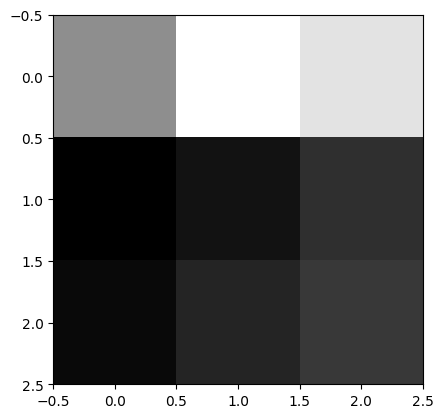

In [122]:
plt.imshow(A[m][0].reshape(3,3))
plt.gray()

In [84]:
A.sort(key = lambda x:x[1], reverse = False)

In [44]:






def jet_heatmap_gray(heatmap, img_path):

    """Obtain jet heat map in grayscale
    input: Input is the 8x8 heatmap
    output: Returns a 2D array of size img.shape[:2]

    """
    #heatmap = get_heatmap(img_path)
    A = np.zeros(shape= (8,8,3), dtype= "float128").astype(np.float128)
    A[:,:,0] = heatmap
    A[:,:,1] = heatmap
    A[:,:,2] = heatmap

    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)
    

    heatmap_test = keras.preprocessing.image.array_to_img(A)
    heatmap_test = heatmap_test.resize((img.shape[1], img.shape[0]))
    heatmap_gray = keras.preprocessing.image.img_to_array(heatmap_test)

    return img, img.shape, heatmap_gray[:,:,0]





def prob_gray(heat_data):

    """
    Input: 8x8 heatmap
    Output: List of intensities at each pixel
    The intensities summed up to 1
    """
    heat_data = heat_data.astype(np.float128)
    heat_data = 1/heat_data.max()*heat_data
    heat_data = np.exp(heat_data)
    heat_data = np.exp(heat_data)
    heat_data = np.exp(heat_data)
    heat_data = (np.exp(1)+ heat_data)**3
    max_sum = np.sum(heat_data)
    prob_gray_im = 1/max_sum* heat_data
    
    

    prob_gray_im = np.round(prob_gray_im, decimals= 16)
    return list(prob_gray_im.flatten()), np.asarray(list(prob_gray_im.flatten())).astype(np.float128)




def red_regions_index(heatmap, img_path, n):



    img_arr, shape_, heat_data = jet_heatmap_gray(heatmap, img_path)
    prob_data,_ = prob_gray(heat_data)
    array_prob_data = np.asarray(prob_data)
    array_prob_data = array_prob_data.astype(np.float64)
    array_prob_data[array_prob_data.argmax()]+=(1- array_prob_data.sum())
    
    a = shape_[0]
    b = shape_[1]
    A = np.arange(a)
    B = np.arange(b)
    C = list(product(A,B))

    index_regions = np.random.choice(len(prob_data), n, replace=False, p= list(array_prob_data))

    return img_arr, index_regions, C





In [34]:
with open('heatmap_folder/n01748264_gray_heatmap/n01748264_1.JPEG_heat_data.pckl', 'rb') as handle:
    heatmap= pickle.load(handle)

In [13]:
with open('patches0_:2_3.pckl', 'rb') as handle:
    A= pickle.load(handle)

In [14]:
len(A)

867483

In [35]:
img_path = 'data_folders_gray/n01748264_gray/n01748264_1.JPEG'

In [62]:
n= 900
_, _, heatdata = jet_heatmap_gray(heatmap, img_path)
img_array, indexes, array = red_regions_index(heatmap, img_path, n)


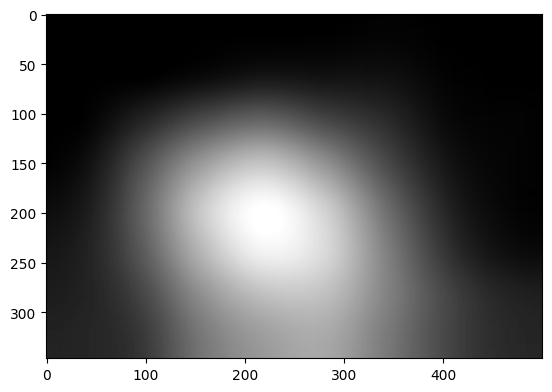

In [59]:
plt.imshow(heatdata)

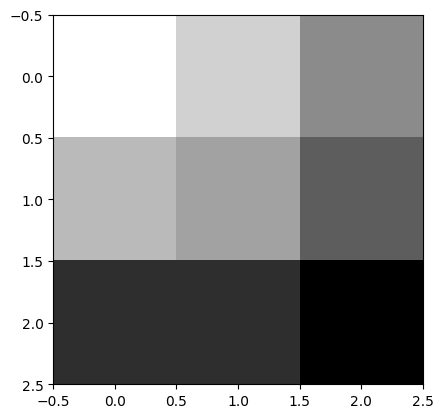

In [64]:
plt.imshow(img_array[:, :, 0][array[indexes[m]][0]:(array[indexes[m]][0])+3, array[indexes[m]][1]:array[indexes[m]][1]+3])

In [63]:
 m = 0
array[indexes[m]]

(204, 217)

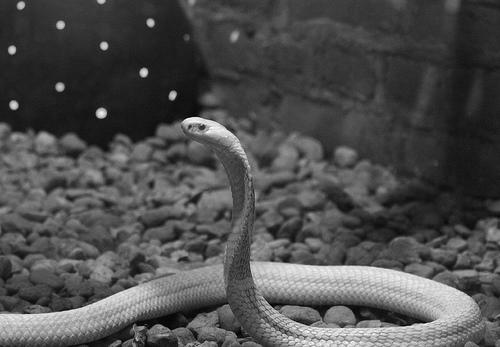

In [38]:
display(Image1(img_path))

In [16]:
outfilez = open('patches0_:30_1u.pckl', 'wb')
pickle.dump(B, outfilez)
outfilez.close() 


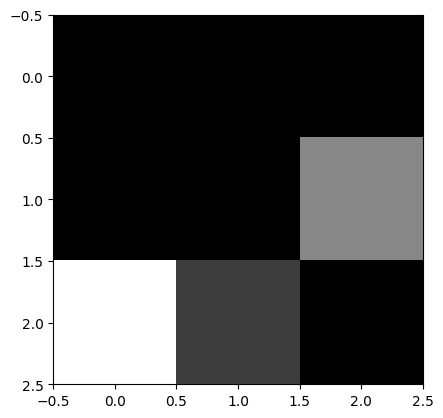

In [18]:
plt.imshow(B[545].reshape(3,3))
plt.gray()

In [ ]:
import pickle

outfilez = open('D-sort_patches0_:30_1.pckl', 'wb')
pickle.dump(A, outfilez)
outfilez.close() 


In [ ]:
import math
A = A_1[0:math.ceil(50/100*len(A_1))]

In [ ]:
len(A)

In [ ]:
import pickle

with open('D-sort_patches0_:30_1.pckl', 'rb') as handle:
    Q= pickle.load(handle)

with open('patches30_:60.pckl', 'rb') as handle:
    P= pickle.load(handle)

In [ ]:
import math

A = list(Q[0:math.ceil(50/100*len(Q))])
#B = list(Q[0:math.ceil(50/100*len(P))])

In [ ]:
A.extend(list(P))


In [ ]:
import numpy as np

array_C = np.asarray(A)

In [ ]:
A_1 = merge_Dnorm_list(array_C)

A_1 = np.asarray(A_1)

In [ ]:

P = list(A_1[0:math.ceil(10/100*len(A_1))])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
from sklearn.manifold import Isomap
from numpy.linalg import norm
from ripser import ripser
from persim import plot_diagrams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
from sklearn.neighbors import KDTree

def dense_sort_data(k, perc, n):
    P = patches_n_folder(n)

    tree = KDTree(P, leaf_size =40)
    dist, ind = tree.query(P, k)

    data_sort = list(zip(list(P), dist[:,k-1]))
    len_data = len(data_sort)

    data_sort.sort(key = lambda x:x[1], reverse = False)

    B = list(zip(*data_sort[0:math.ceil(perc/100*len_data)]))[0]

    return np.asarray(B)


In [2]:
import numpy as np

A = np.array([[1,2,3], [2,3,4], [4,9,9], [8,9,0], [78,9 ,-3], [23, 45, 7]])
A.shape

(6, 3)

In [4]:
B = np.random.choice(list(A), 3)
B

ValueError: a must be 1-dimensional